# Plotting the dijet invariant mass
## Using PyROOT

In [1]:
import ROOT
import numpy as np
# Formatting purposes
ROOT.gROOT.SetBatch(1)  # makes it faster- doesn't send lots of canvases over x11 connection


path_to_data = '../../data/'

folder15 = 'breynold/user.breynold.data15_13TeV.00284484.physics_Main.DAOD_NTUP_JTRIG_JETM1.r9264_p3083_p3601_j042_tree.root/'
file15 = 'user.breynold.18753218._000001.tree.root'
folder16 = 'breynold/user.breynold.data16_13TeV.00307656.physics_Main.DAOD_NTUP_JTRIG_JETM1.r9264_p3083_p3601_j042_tree.root/'
file16 = 'user.breynold.18797259._000001.tree.root'

# Load a ROOT file
path1 = path_to_data + folder16 + file16
rootfile1 = ROOT.TFile(path1)
ttree1 = rootfile1.Get('outTree/nominal')

Welcome to JupyROOT 6.18/04


In [2]:
c1 = ROOT.TCanvas("c1", "ROOT Canvas")
h1 = ROOT.TH1D("h1", "Invariant mass", 100, 0, 3000)

In [3]:
n_events = ttree1.GetEntries()
for ii in np.arange(ttree1.GetEntriesFast()):
    ttree1.GetEntry(ii)
    if ii % 100000 == 0:
        print('Entry ', ii, ' done...')
    
    if len(ttree1.AntiKt4EMPFlowJets_Calib2018_E) > 1:  # Only consider events with 2 or more jets
        e1 = ttree1.AntiKt4EMPFlowJets_Calib2018_E[0]
        pt1 = ttree1.AntiKt4EMPFlowJets_Calib2018_pt[0]
        eta1 = ttree1.AntiKt4EMPFlowJets_Calib2018_eta[0]
        phi1 = ttree1.AntiKt4EMPFlowJets_Calib2018_phi[0]

        e2 = ttree1.AntiKt4EMPFlowJets_Calib2018_E[1]
        pt2 = ttree1.AntiKt4EMPFlowJets_Calib2018_pt[1]
        eta2 = ttree1.AntiKt4EMPFlowJets_Calib2018_eta[1]
        phi2 = ttree1.AntiKt4EMPFlowJets_Calib2018_phi[1]


        v1 = ROOT.TLorentzVector()
        v1.SetPtEtaPhiE(pt1, eta1, phi1, e1)
        v2 = ROOT.TLorentzVector()
        v2.SetPtEtaPhiE(pt2, eta2, phi2, e2)
        vjj = v1 + v2

        mjj = vjj.M()

        h1.Fill(mjj)

Entry  0  done...
Entry  100000  done...
Entry  200000  done...
Entry  300000  done...
Entry  400000  done...
Entry  500000  done...
Entry  600000  done...
Entry  700000  done...
Entry  800000  done...
Entry  900000  done...
Entry  1000000  done...
Entry  1100000  done...
Entry  1200000  done...
Entry  1300000  done...
Entry  1400000  done...
Entry  1500000  done...
Entry  1600000  done...
Entry  1700000  done...
Entry  1800000  done...
Entry  1900000  done...


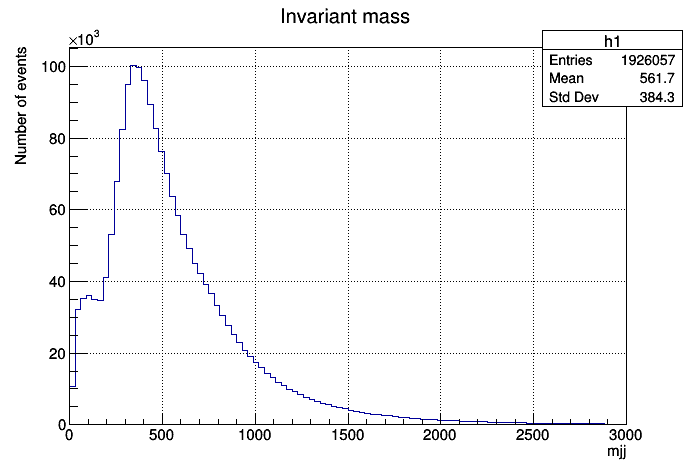

In [4]:
h1.GetXaxis().SetTitle('mjj')
h1.GetYaxis().SetTitle('Number of events')
c1.SetGrid()
h1.Draw()
c1.Draw()

## Using uproot

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot
import ROOT

In [6]:
folder15 = 'user.breynold.data15_13TeV.00284484.physics_Main.DAOD_NTUP_JTRIG_JETM1.r9264_p3083_p3601_j042_tree.root/'
file15 = 'user.breynold.18753218._000001.tree.root'
folder16 = 'user.breynold.data16_13TeV.00307656.physics_Main.DAOD_NTUP_JTRIG_JETM1.r9264_p3083_p3601_j042_tree.root/'
file16 = 'user.breynold.18797259._000001.tree.root'

In [7]:
# Load a ROOT file
filePath = folder16 + file16
rootFile = uproot.open(filePath)

In [8]:
tree = rootFile['outTree']['nominal']

In [9]:
# Loading the entire tree into a DataFrame takes way to much memory, > 15 GB

# Create and fill a dataframe
#df = pd.DataFrame()
#for key in tree.keys():
#    df[key] = tree.array(key)
#df.head()

In [10]:
canv = ROOT.TCanvas("canv", "tempCanvas")

In [11]:
branchnames_energy = ['HLT_a4tcemsubjesFS_Jets_E',
                      'AntiKt4EMTopoJets_Calib2018_E',
                      'AntiKt4EMPFlowJets_Calib2018_E',
                      'AntiKt10LCTopoTrimmedPtFrac5SmallR20Jets_Calib2018_E']

branchnames_pT = ['HLT_a4tcemsubjesFS_Jets_pt',
                  'AntiKt4EMTopoJets_Calib2018_pt',
                  'AntiKt4EMPFlowJets_Calib2018_pt',
                  'AntiKt10LCTopoTrimmedPtFrac5SmallR20Jets_Calib2018_pt']


branchnames_eta = ['HLT_a4tcemsubjesFS_Jets_eta',
                   'AntiKt4EMTopoJets_Calib2018_eta',
                   'AntiKt4EMPFlowJets_Calib2018_eta',
                   'AntiKt10LCTopoTrimmedPtFrac5SmallR20Jets_Calib2018_eta']

branchnames_phi = ['HLT_a4tcemsubjesFS_Jets_phi',
                   'AntiKt4EMTopoJets_Calib2018_phi',
                   'AntiKt4EMPFlowJets_Calib2018_phi',
                   'AntiKt10LCTopoTrimmedPtFrac5SmallR20Jets_Calib2018_phi']

In [12]:
ii = 1
E = tree.array(branchnames_energy[ii])
pT = tree.array(branchnames_pT[ii])
eta = tree.array(branchnames_eta[ii])
phi = tree.array(branchnames_phi[ii])

In [13]:
E[5]

array([503.4764  , 208.3003  , 111.32473 , 140.67966 , 151.02446 ,
       178.25615 , 114.243416,  22.292328,  19.555593,  51.679325,
        36.362473,  15.8076  ], dtype=float32)

In [14]:
pT.shape

(1940650,)

In [15]:
hist = ROOT.TH1D("hist", "Invariant mass", 100, 0, 3000)
hist_from_vec = ROOT.TH1D("hist_from_vec", "Invariant mass", 100, 0, 3000)
hist_from_eptetaphi = ROOT.TH1D("hist_from_eptetaphi", "Invariant mass", 100, 0, 3000)

In [16]:
for ii, en in enumerate(E):
    if len(en) > 1:
        E1 = en[0]
        E2 = en[1]
        pT1 = pT[ii][0]
        pT2 = pT[ii][1]
        eta1 = eta[ii][0]
        eta2 = eta[ii][1]
        phi1 = phi[ii][0]
        phi2 = phi[ii][1]
        
        vec4_1 = ROOT.TLorentzVector()
        vec4_1.SetPtEtaPhiE(pT1, eta1, phi1, E1)
        vec4_2 = ROOT.TLorentzVector()
        vec4_2.SetPtEtaPhiE(pT2, eta2, phi2, E2)
        vec4_jj = vec4_1 + vec4_2
        
        mjj = vec4_jj.M()

        hist.Fill(mjj)

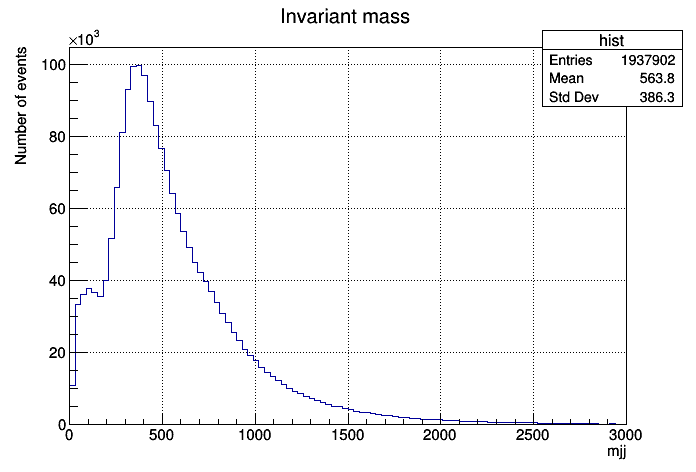

In [17]:
hist.GetXaxis().SetTitle('mjj')
hist.GetYaxis().SetTitle('Number of events')
canv.SetGrid()
hist.Draw()
canv.Draw()